# Pymaceuticals Inc.
---

### Analysis

* With the help of the Summary Table, we can see that average volumes of tumors for mice who are threated with ' Capomulin' and ' Ramicane' are smaller than the mice who are treated with other drugs.

* In this study, bar chart shows that the number of mice treated with ' Capomulin' and ' Ramicane' drug regimens are more than the mice who are treated with othr drugs.

* Distribution of mice according to sex is 49% Female and 51% Male.

* When we look at the line plot of Tumor Volume and Timepoint for mouse ID 'l509' which is trreated with Capomulin, we saw that tumor size decrease overtime.

* Scatter plot of 'weight of mice' and 'tumor volume' shows that there is a positive correlation between weight and tumor volume. Our regression analysis supports this finding.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_complete = pd.merge(mouse_metadata, study_results, how = 'right', on = ('Mouse ID', 'Mouse ID'))

# Display the data table for preview

data_complete = pd.DataFrame(data_complete[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']])
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
data_complete['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = data_complete[data_complete.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicateRows

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dublicate_df = data_complete.loc[data_complete['Mouse ID']=='g989']
dublicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
## If we want to just drop of the dublicate lines, not the whole data about the mouse.
    ##   clean_data = data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep = 'last')


clean_data = data_complete.loc[data_complete['Mouse ID'] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = clean_data.set_index('Drug Regimen')

tumor_vol_mean = drug_regimen.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_vol_median = drug_regimen.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_vol_var = drug_regimen.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_vol_std = drug_regimen.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_vol_sem = drug_regimen.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

sum_stat = pd.DataFrame({
    'Mean Tumor Volume': tumor_vol_mean, 
    'Median Tumor Volume': tumor_vol_median,
    'Tumor Volume Variance': tumor_vol_var,
    'Tumor Volume Std. Dev.': tumor_vol_std,
    'Tumor Volume Std. Err.': tumor_vol_sem
    })

sum_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

sum_stat2 = clean_data.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
sum_stat2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

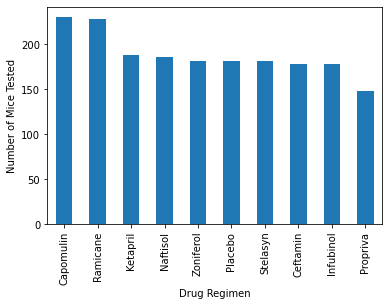

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

tests = clean_data.groupby('Drug Regimen').count()['Timepoint'].sort_values(ascending=False)

plot = tests.plot(kind = 'bar')
plot.set_xlabel("Drug Regimen")
plot.set_ylabel("Number of Mice Tested")
plt.savefig("./Images/PandasBar.png")

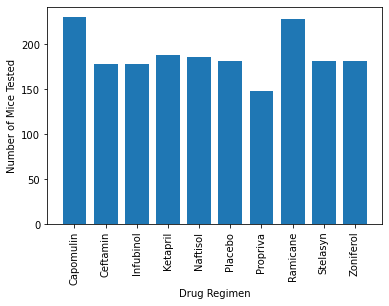

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#x_axis = clean_data['Drug Regimen'].unique().tolist()

tests = clean_data.groupby('Drug Regimen').count()['Timepoint']

x_axis = np.arange(len(tests))
tick_locations = [x *1.7 for x in x_axis]


plt.bar(tick_locations, tests, width = 1.3)

plt.xticks(tick_locations, tests.index, rotation = "vertical")
 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.savefig("./Images/PyPlotBar.png")

In [11]:
gender = clean_data.groupby('Sex').count()
gender = gender["Mouse ID"].to_frame().rename(columns = {"Mouse ID":"Gender#"})
gender

,Gender#
Sex,
Female,922
Male,958


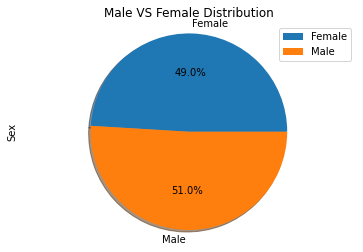

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_pie = gender.plot(kind="pie", y='Gender#', title = "Male VS Female Distribution", autopct="%1.1f%%", shadow=True, legend = True)
gender_pie.set_ylabel("Sex")

plt.axis("equal")
plt.savefig("./Images/PandasPies.png")
plt.show()

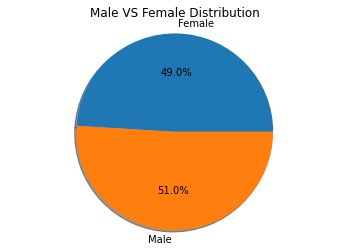

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_data['Sex'].unique()

gender_numbers = gender['Gender#'].to_list()

plt.pie(gender_numbers, labels=sex, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.title("Male VS Female Distribution")
plt.savefig("./Images/PyPlotPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_data = clean_data.set_index('Drug Regimen').loc[['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']].reset_index()

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = pd.DataFrame(last_timepoint).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merging according to two different columns

merged = pd.merge(clean_data, last_timepoint, on = ['Mouse ID','Timepoint'])
merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25


In [15]:
capomulin = merged.loc[merged['Drug Regimen']== 'Capomulin']['Tumor Volume (mm3)']
ramicane = merged.loc[merged['Drug Regimen']== 'Ramicane']['Tumor Volume (mm3)']
infubinol = merged.loc[merged['Drug Regimen']== 'Infubinol']['Tumor Volume (mm3)']
ceftamin = merged.loc[merged['Drug Regimen']== 'Ceftamin']['Tumor Volume (mm3)']

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_outlier = capomulin.loc[(merged['Tumor Volume (mm3)'] > cap_upper_bound) | (merged['Tumor Volume (mm3)'] < cap_lower_bound)]

print(f'For Capomulin Drug Regimen:')
print(f"The lower quartile of treatment is: {round(cap_lowerq,2)}")
print(f"The upper quartile of treatment is: {round(cap_upperq,2)}")
print(f"The interquartile range of treatment is: {round(cap_iqr,2)}")
print(f"The the median of treatment is: {round(cap_quartiles[0.5],2)} ")
print(f"Values below {round(cap_lower_bound,2)} could be outliers.")
print(f"Values above {round(cap_upper_bound,2)} could be outliers.")
print(f'Capomulin potential outliers:  {cap_outlier}')
print(f'--------------------------------------------')

ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
ram_outlier = ramicane.loc[(merged['Tumor Volume (mm3)'] > ram_upper_bound) | (merged['Tumor Volume (mm3)'] < ram_lower_bound)]

print(f'For Ramicane Drug Regimen:')
print(f"The lower quartile of treatment is: {round(ram_lowerq,2)}")
print(f"The upper quartile of treatment is: {round(ram_upperq,2)}")
print(f"The interquartile range of treatment is: {round(ram_iqr,2)}")
print(f"The the median of treatment is: {round(ram_quartiles[0.5],2)} ")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")
print(f'Ramicane potential outliers:  {ram_outlier}')
print(f'--------------------------------------------')


For Capomulin Drug Regimen:
The lower quartile of treatment is: 32.38
The upper quartile of treatment is: 40.16
The interquartile range of treatment is: 7.78
The the median of treatment is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Capomulin potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------
For Ramicane Drug Regimen:
The lower quartile of treatment is: 31.56
The upper quartile of treatment is: 40.66
The interquartile range of treatment is: 9.1
The the median of treatment is: 36.56 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------


In [17]:
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
inf_outlier = infubinol.loc[(merged['Tumor Volume (mm3)'] > inf_upper_bound) | (merged['Tumor Volume (mm3)'] < inf_lower_bound)]

print(f'For Infubinol Drug Regimen:')
print(f"The lower quartile of treatment is: {round(inf_lowerq,2)}")
print(f"The upper quartile of treatment is: {round(inf_upperq,2)}")
print(f"The interquartile range of treatment is: {round(inf_iqr,2)}")
print(f"The the median of treatment is: {round(inf_quartiles[0.5],2)} ")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")
print(f'Infubinol potential outliers:  {inf_outlier}')
print(f'--------------------------------------------')

cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
cef_outlier = ceftamin.loc[(merged['Tumor Volume (mm3)'] > cef_upper_bound) | (merged['Tumor Volume (mm3)'] < cef_lower_bound)]

print(f'For Ceftamin Drug Regimen:')
print(f"The lower quartile of treatment is: {round(cef_lowerq,2)}")
print(f"The upper quartile of treatment is: {round(cef_upperq,2)}")
print(f"The interquartile range of treatment is: {round(cef_iqr,2)}")
print(f"The the median of treatment is: {round(cef_quartiles[0.5],2)} ")
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")
print(f'Ceftamin potential outliers:  {cef_outlier}')
print(f'--------------------------------------------')

For Infubinol Drug Regimen:
The lower quartile of treatment is: 54.05
The upper quartile of treatment is: 65.53
The interquartile range of treatment is: 11.48
The the median of treatment is: 60.17 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol potential outliers:  4    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------------------------------
For Ceftamin Drug Regimen:
The lower quartile of treatment is: 48.72
The upper quartile of treatment is: 64.3
The interquartile range of treatment is: 15.58
The the median of treatment is: 59.85 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin potential outliers:  Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------


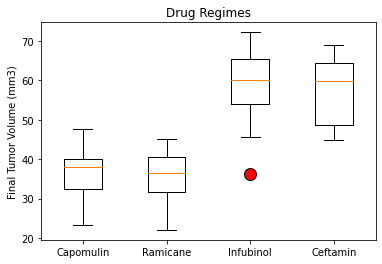

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot=[capomulin, ramicane, infubinol, ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimes')
ax1.set_ylabel('Final Tumor Volume (mm3)')

plot=ax1.boxplot(data_to_plot, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

for flier in plot['fliers']:
    flier.set(marker='o', markerfacecolor='r', markersize=12)
    
plt.savefig("./Images/BoxPlot.png")
plt.show()


## Line and Scatter Plots

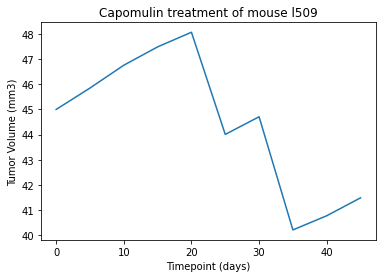

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

l509 = clean_data.loc[clean_data["Mouse ID"] == "l509"]

x_axis = l509['Timepoint'].tolist()

y_axis = l509['Tumor Volume (mm3)'].tolist()

plt.plot(x_axis, y_axis)

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

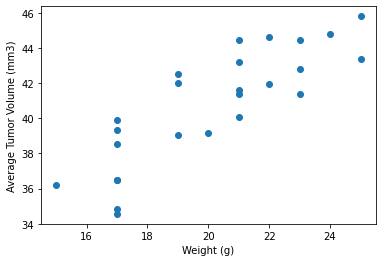

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_weight= clean_data.loc[clean_data['Drug Regimen']=='Capomulin'].groupby('Mouse ID').mean()

wx_axis = capomulin_weight['Weight (g)']

wy_axis = capomulin_weight['Tumor Volume (mm3)']

plt.scatter(wx_axis, wy_axis)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight (g) and the average tumor volume (mm3) is 0.84


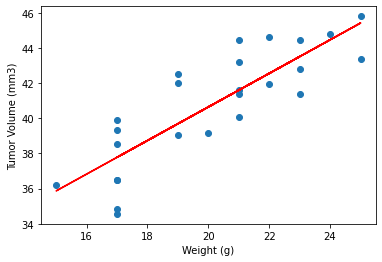

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(wx_axis,wy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(wx_axis, wy_axis)
regress_values = wx_axis * slope + intercept

plt.scatter(wx_axis,wy_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(wx_axis,regress_values, "r-")

print(f'The correlation between mouse weight (g) and the average tumor volume (mm3) is {round(correlation[0],2)}')